# Сборный проект №1. Анализ индустрии компьютерных игр.

**Описание проекта**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель работы** Выявить определяющие успешность игры закономерности,чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Основные данные**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 


**Ход работы:**

<a href='#the_destination'>Шаг 1.Загрузка данных</a>
    
<a href='#the_destination2'>Шаг 2.Предобработка данных</a>
    
<a href='#the_destination3'>Шаг 3. Исследовательский анализ данных</a>

На данном шаге ответим на опросы и сделаем выводы :

 - Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?;

 - Как менялись продажи по платформам?;

 - Какие платформы лидируют по продажам, растут или падают?;

 - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?;

 - Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</a>
    
<a href='#the_destination4'>Шаг 4. Составление портрета пользователя каждого региона</a>

Определим портрет для пользователя каждого региона (NA, EU, JP) и ответим на вопросы:

 - Самые популярные платформы (топ-5).

 - Самые популярные жанры (топ-5). 

 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a href='#the_destination5'>Шаг 5. Проверка гипотез</a>

 Проверим гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

 - Средние пользовательские рейтинги жанров Action и Sports разные.

<a href='#the_destination6'>Шаг 6. Вывод


In [1]:
#импортирую библиотеки 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import binom

### check

<a id='the_destination'></a>
**Шаг 1. Загрузка данных**


In [3]:
#читаю файл и вывожу первые 10 строк
data=pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#вывожу информацию на экран
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На этапе предобработка необходимо будет привести наименования столбцов к нижнему регистру и преобразовать тип данных в столбце User_Score на float и  Year_of_Release на int.

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


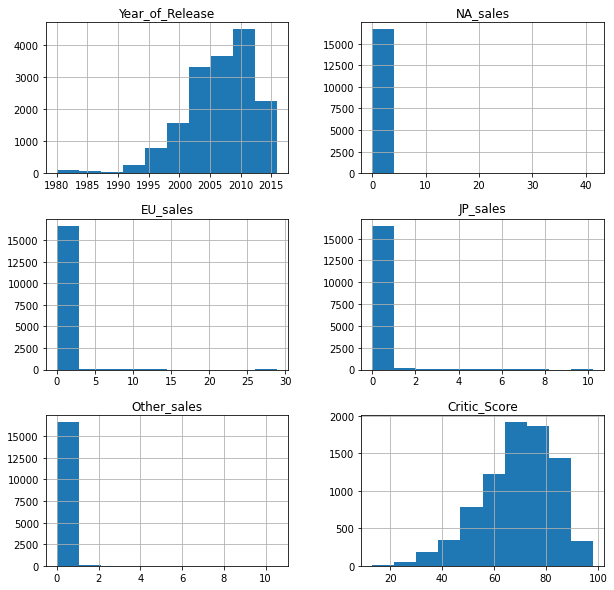

In [6]:
data.hist(figsize=(10,10))
plt.show()

Предположительно больше всего игр выпущено за 2008-2012 год.

Оценки критиков в большенстве в районе от 63-80.

**Вывод** Наш датафрейм содержит в себе 16715 записей. Вижу, что в данных присутсвуют пропуски, которые необходимо будет обработать, сделаю это на этапе предобработки. Также необходимо будет привести наименования столбцов к нижнему регистру и преобразовать тип данных.

**Шаг 2.Предобработка данных**
<a id='the_destination2'></a>

На этапе предобработка необходимо:

- Привести наименование столбцов к нижнему регистру;

- Преобразовать данные в нужные типы;

- Проверить наличие пропусков и дубликатов. Обработать при необходимости;

- Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. 

In [7]:
#приведу наименования столбцов к нижнему регистру 
data.columns=data.columns.str.lower()
#выведу на экран
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

В столбце year_of_release содержится инофрмация о годе выпуска. Это целое число,поменяю тип на int.

In [8]:
#преобразую тип данных
data['year_of_release'] = pd.array(data['year_of_release'], dtype = pd.Int64Dtype())
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Чтобы преобразовать данные в столбце user_score,необходимо обратить внимание на аббревиатуру 'tbd',выведу на экран уникальные значения в данном столбце. 

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

TBD -To Be Determined,что фактически переводится как 'будет определено позже',т.е. эти данные отсутсвуют вовсе или их не успели внести до выгрузки.Заменю их на Nan и преобразую тип данных на float,т.к в нем содержатся не целые числа.

In [10]:
#замею tbd на Nan
data['user_score']= data['user_score'].replace('tbd', np.NaN)
#преобразую тип данных
data['user_score'] = data['user_score'].astype('float')
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [11]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

pass_value_barh(data)

In [12]:
#проверю количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски могли образоваться двумя способами:

Вызванные человеческим фактором. Кто-то не ввел нужную информацию.

Технологические. Возникают во время копирования, считывания или записи данных, изменения формата файла, выгрузки или интеграции из сторонней БД.

Вижу, что столбцы name и genre имеют по 2 пропуска.Их можем удалить, это некритично, т.к записи не помогут решить главную задачу проекта .

Столбец year_of_release имеет 269 пропусков.Пока оставлю данные без изменения,т.к. это тоже некритично для всего датафрейма. 

Столбцы **critic_score,user_score  и rating** имеют уже гораздо больше пропусков. Пока оставлю эти данные без изменений. Пропуски в данных столбцах могли быть вызваны человеческим фактором,люди просто не ввели необходимую информацию. 


In [13]:
#удалю пропуски в столбцах имя и жанр 
data=data.dropna(subset=['name','genre'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [14]:
#проверяю  явные дубликаты 
print('Количество явных дубликатов:',data.duplicated().sum())

Количество явных дубликатов: 0


In [15]:
#проверю наличие неполных дубликатов по ключевым столбцам
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [16]:
#удалю дубликаты
data=data.drop_duplicates(['name', 'platform', 'year_of_release'])
#проверяю
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Чтобы проверить неявные дубликаты, необходимо предположить в каких столбцах они могут встретиться.

Полагаю, что дубликаты могут быть в столбцах **name,platform и genre.**

In [17]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Дубликатов в данном столбце нет, это отлично.

In [18]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В наименовании платформ тоже отсутсвуют дубликаты. 

In [19]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Жанры все разные, как говорится -на вкус и цвет. Никакие изменения в данные столбцы вносить нет неоходимости.

Для полноценного анализа посчитаю суммарные продажи во всех регионах. Запишу их в отдельный столбец.

In [20]:
data['total_sales']= data['na_sales']+ data['eu_sales']+ data['jp_sales']+ data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16712, dtype: float64

**Вывод:** На этапе предобработка привела наименования столбцов к нижнему регистру. Преобразовала тип данных в столбце year_of_release на целочисленный тип, т.к. данные содержат год выпуска и столбец user_score на тип с плавающей точкой, т.к. в столбе содержатся оценка пользователей. 

Также в столбце user_score заменила tbd (to be determined) на Nan.

Дубликатов нет, а вот пропуски присутсвуют. Оставила их пока без изменени, за исключением двух пропусков в столбце name и genre.

Приступаю к исследовательскому анализу.

In [21]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
 11  total_sales      16712 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [22]:
#заменю пропуски на "undefiend"
data['rating'] = data['rating'].fillna('undefined')
data['rating'].isna().sum()

0

### check

**Шаг 3. Исследовательский анализ данных**
<a id='the_destination3'></a>

Нам необходимо проанализировать:

- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?;

- Как менялись продажи по платформам?;

- Какие платформы лидируют по продажам, растут или падают?;

- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?;

- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


<a id='the_destination9'></a>**3.1.Сколько игр выпускалось в разные годы**

In [23]:
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Компьютерные игры появились аж в 1980 году.

Построю график.

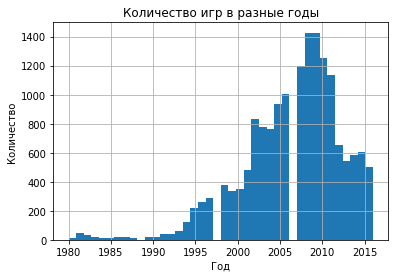

In [24]:
data.hist('year_of_release',bins=40)
plt.title('Количество игр в разные годы')                                        
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

На графике видно, сфера компьютерных игр появилась еще в 1980 году,однако развитие и подъем пошел только после 2003 года. Тогда начали появляться ПК у некоторых жителей нашей страны, однако не все могли себе позволить такую "роскошь". Пик приходится на 2007-2009 года, могу смело предположить, что в эти года ПК могли быть практически в каждой семье.

Также на графике виден спад с 2011-2012 года. В это время уже вовсю было развитие социальных сетей и мобильных телефонов, поэтому и появляется спад.

<a id='the_destination10'></a> **3.2. Продажи в зависимости от платформы**

Чтобы проанализировать как менялись продажи по платформам, построю сводную таблицу. 

In [25]:
sales_by_platform=data.pivot_table(
    index='platform',
    values=['total_sales'],
    aggfunc='sum')
sales_by_platform.sort_values(by='total_sales',ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


В шестерке лидеров **PS2,X360,PS3,Wii,DS и PS**. Продажи последнего из нашего списка лидеров практически вдвое больше платформ, которые отсают на 1-2 места. 

Сделаю срез по наибольшими суммарным продажам популярных платформ и проверю их распределение по годам.

In [26]:
top_platform=data.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')
top_platform.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,undefined,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


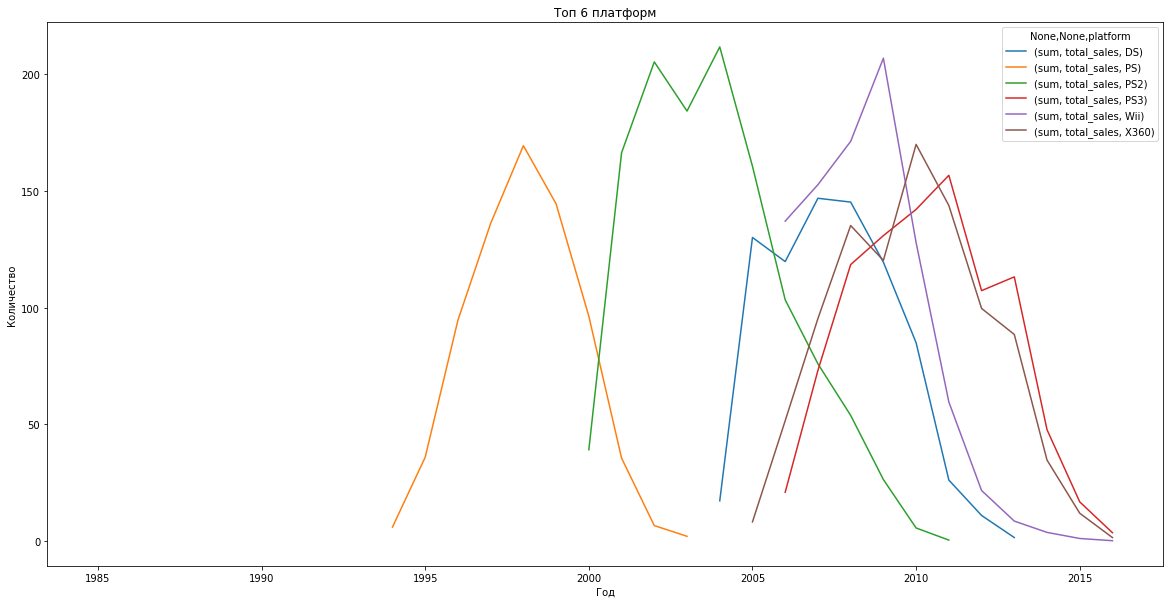

In [27]:
#построю сводную таблицу по годам и создам гарфик 
top_platform_year=top_platform.pivot_table(
    index=['year_of_release'],
    columns=['platform'],
    values=['total_sales'],
    aggfunc=['sum']
)
top_platform_year.plot(figsize=(20,10))
plt.title('Топ 6 платформ')                                        
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()


In [28]:
# check
top_platform.pivot_table(
    index=['year_of_release'],
    columns=['platform'],
    values=['total_sales'],
    aggfunc=['sum']
)[:3]

sum                        
                total_sales                        
platform                 DS     PS PS2 PS3 Wii X360
year_of_release                                    
1985                   0.02    NaN NaN NaN NaN  NaN
1994                    NaN   6.03 NaN NaN NaN  NaN
1995                    NaN  35.96 NaN NaN NaN  NaN

Наш список топ был PS2,X360,PS3,Wii,DS и PS.


Таким образом мы видим, что PS2 с 2000 по 2011 год.(11 лет)

Х360 С 2005 ПО 2016 год.(11 лет)

PS3 с 2006 по 2016 год.(10 лет)

Wii с 2006 по 2016 год.(10 лет)

DS с 2003 по 2012 год.(11 лет)

PS с 1994 по 2003 год.(9 лет)

Ничто не вечно, все платформы проходят по одному пути: появляются- возрастает спрос- спрос доходит до пика и идет вниз.Далее платформа исчезает.



Так как наша задача сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год, нам нет необходимости анализировать платформы, которые на 2016 год уже пришли к своему завершению. Возьмем данные за актуальный период.

Актуальным периодом можно считать временной промежуток, от 2007 года, т.к. цикл  одной платформы 10 лет. Чтобы делать ставку на популярные продукт, необходимо обратиться к платформам, которые либо только появились и двигаются к своему пику,находятся на пике или же близятся к завершению, но еще действуют. 

Актуальные -те, которые появились в период с 2007 года и не закончили свое существоание хотя бы к 2014 году. Буду анализировать данные с 2012 года.

<a id='the_destination11'></a>  **3.3.Какие платформы лидируют по продажам, растут или падают?**

In [29]:
actual_platforms= data.query('year_of_release>= 2014')
actual_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,undefined,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,undefined,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [30]:
#выведу актуальные платформы
actual_platforms['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [31]:
#найду лучшие продажи по платформам за актуальный период
best_sales_platform=actual_platforms.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc=['sum'])
best_sales_platform

sum
                         total_sales
platform year_of_release            
3DS      2014                  43.76
         2015                  27.78
         2016                  15.14
PC       2014                  13.28
         2015                   8.52
         2016                   5.25
PS3      2014                  47.76
         2015                  16.82
         2016                   3.60
PS4      2014                 100.00
         2015                 118.90
         2016                  69.25
PSP      2014                   0.24
         2015                   0.12
PSV      2014                  11.90
         2015                   6.25
         2016                   4.25
Wii      2014                   3.75
         2015                   1.14
         2016                   0.18
WiiU     2014                  22.03
         2015                  16.35
         2016                   4.60
X360     2014                  34.74
         2015                  11.96
         2016                   1.52
XOne     2014                  54.07
         2015                  60.14
         2016                  26.15

In [32]:
best_sales_platform=actual_platforms.pivot_table(index='platform',values='total_sales',aggfunc='sum')
best_sales_platform.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Таким образом платформы PS4,PS3,X360 лидируют по продажам. В тройке отсающих -Wii,DS,PSP.

In [33]:
#построю сводную таблицу по актуальности платформ по годам
best_platform_year=actual_platforms.pivot_table(index=['year_of_release'],columns=['platform'],values=['total_sales'],aggfunc=['sum'])
best_platform_year.head(10)

sum                                                  \
                total_sales                                                   
platform                3DS     PC    PS3     PS4   PSP    PSV   Wii   WiiU   
year_of_release                                                               
2014                  43.76  13.28  47.76  100.00  0.24  11.90  3.75  22.03   
2015                  27.78   8.52  16.82  118.90  0.12   6.25  1.14  16.35   
2016                  15.14   5.25   3.60   69.25   NaN   4.25  0.18   4.60   

                               
                               
platform          X360   XOne  
year_of_release                
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

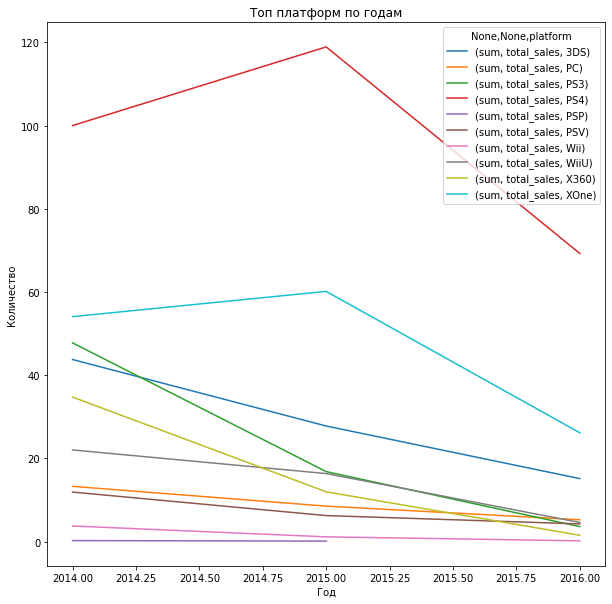

In [34]:
#построю график 
best_platform_year.plot(figsize=(10,10))
plt.title('Топ платформ по годам')                                        
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()


По графику видно, что практическси все платформы двигаются в сторону заверщения совей карьеры. Однако есть две платформы, которые начали свой путь позже и их пик также отличается от остальных. Платформы являются еще актуальными на данные момент -**PS4 и XOne.** Также платформа **3DS** начала свой путь раньше,выше упомянутых платформ,но идет равномерно, и на нее тоже стоит обратить внимание.

**Построю график "ящик с усами" по глобальным продажам игр в разбивке по платформам.**

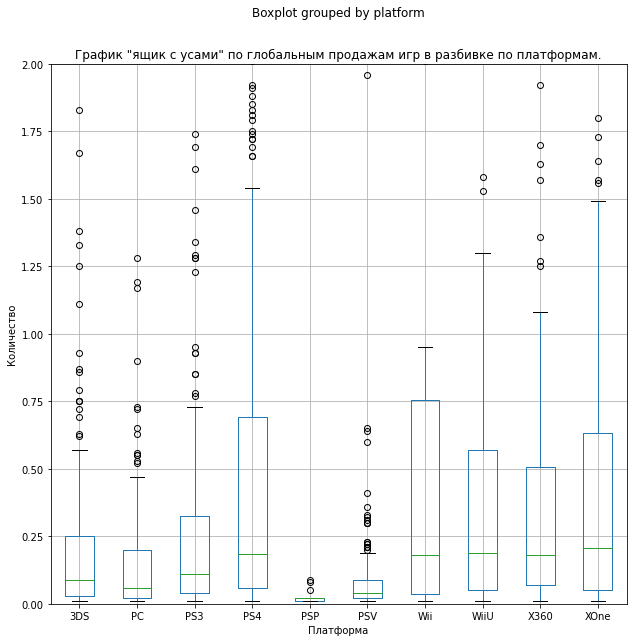

In [35]:
actual_platforms.boxplot(column = ['total_sales'],by = ['platform'],figsize=(10, 10))
plt.ylim([0, 2])
plt.title('График "ящик с усами" по глобальным продажам игр в разбивке по платформам.')                                        
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

На графики вижу, что почти у все платформ много выбросов. Медианы продаж находятся практически на одном уровне. Наибольшие квартили 75% находятся у PS4,X360,XOne,PS3.

Сделаю дополнительный график с использованием seaborn с добавлением showfliers=False,чтобы отсечь выбросы.

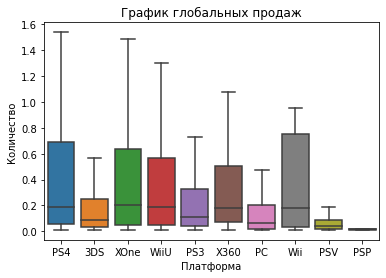

In [36]:
sns.boxplot(data=actual_platforms,x='platform',y='total_sales',showfliers=False)
plt.title('График глобальных продаж')                                        
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

Средняя больше 3го квантиля у PS4,X360,XOne,PS3,Wii это значит эти платформы более популярные

**Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Построю диаграмму рассеяния и посчитаю корреляцию между отзывами и продажами.


Для начала необходимо сделать срез по нужной платформе.

In [37]:
ps3= actual_platforms.query('platform == "PS3"')
#отсортирую по отзывам 
ps3.sort_values(by= 'user_score',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6678,Hatsune Miku: Project Diva F 2nd,PS3,2014,Misc,0.09,0.03,0.10,0.03,78.0,8.6,T,0.25
2248,South Park: The Stick of Truth,PS3,2014,Role-Playing,0.43,0.34,0.00,0.16,85.0,8.5,M,0.93
5528,Alien: Isolation,PS3,2014,Shooter,0.12,0.16,0.00,0.05,NaN,8.3,M,0.33
13861,BlazBlue: Chrono Phantasma Extend,PS3,2015,Action,0.00,0.00,0.04,0.00,NaN,8.3,T,0.04
9997,Deception IV: Blood Ties,PS3,2014,Action,0.03,0.02,0.06,0.01,70.0,8.2,M,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [38]:
#посчитаю коэф.корреляции
print('Корреляция:')
print(ps3['user_score'].corr(ps3['total_sales']).round(2))

Корреляция:
-0.17


Чем ближе коэффициент корреляции к нулю, тем слабее связь между двумя переменными. В моем случае слабая корреляция, оценки пользователей данной платформы не влияют на продажи.

Построю график:

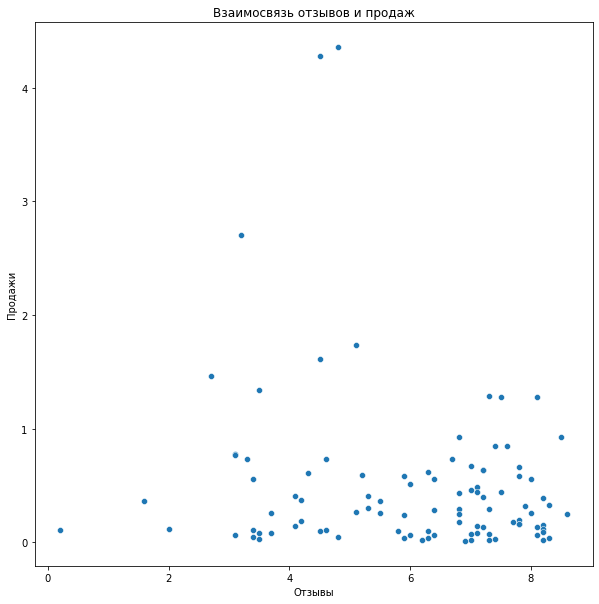

In [39]:
ps3_user_score = sns.scatterplot(data = ps3, x = 'user_score',y = 'total_sales',)
ps3_user_score.figure.set_figwidth(10)
ps3_user_score.figure.set_figheight(10)
plt.title('Взаимосвязь отзывов и продаж')                                        
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.show()

На графике тоже не видна зависимость между оценкой пользователя и продажами. 

In [40]:
#посчитаю коэф.корреляции
print('Корреляция:')
print(ps3['critic_score'].corr(ps3['total_sales']).round(2))

Корреляция:
0.45


Слабая корреляция, нельзя говорить о зависимости, посмотрю на графике.

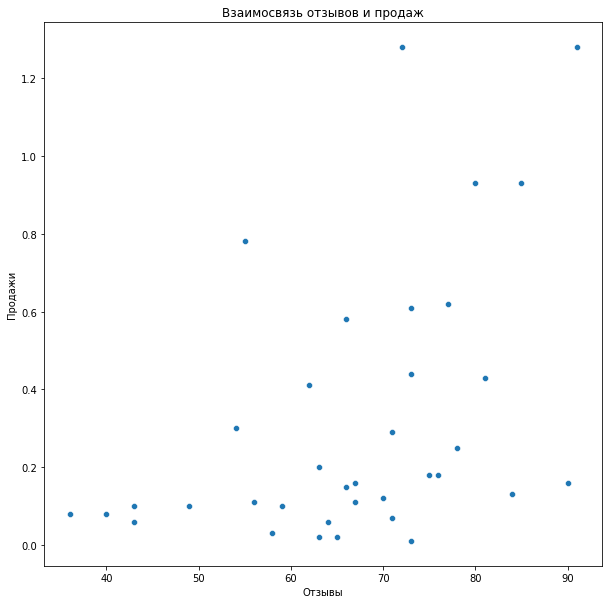

In [41]:
ps3_user_score = sns.scatterplot(data = ps3, x = 'critic_score',y = 'total_sales',)
ps3_user_score.figure.set_figwidth(10)
ps3_user_score.figure.set_figheight(10)
plt.title('Взаимосвязь отзывов и продаж')                                        
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.show()

График зависимости оценки критиков и продаж слегка изменился. Немного видно, что с увеличением оценок , виднеется увеличение продаж, но оно мало.

In [42]:
ps4= actual_platforms.query('platform == "PS4"')
#отсортирую по отзывам 
ps4.sort_values(by= 'user_score',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
1107,Dark Souls III,PS4,2016,Role-Playing,0.65,0.45,0.34,0.22,89.0,8.8,M,1.66
8886,The King of Fighters XIV,PS4,2016,Fighting,0.07,0.02,0.04,0.02,79.0,8.7,T,0.15
4676,Farming Simulator 17,PS4,2016,Simulation,0.05,0.31,0.00,0.06,69.0,8.7,E,0.42
5120,Rocket League,PS4,2016,Sports,0.03,0.28,0.00,0.05,85.0,8.7,E,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16398,Chaos;Child,PS4,2015,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16428,R.B.I. Baseball 2016,PS4,2016,Sports,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01
16496,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [43]:
print('Корреляция:')
print(ps4['user_score'].corr(ps4['total_sales']).round(2))

Корреляция:
-0.04


Коэффициент корреляции близок к нулю, тоже нельзя говорить о взаимосзвязи.

Посмотрю график.

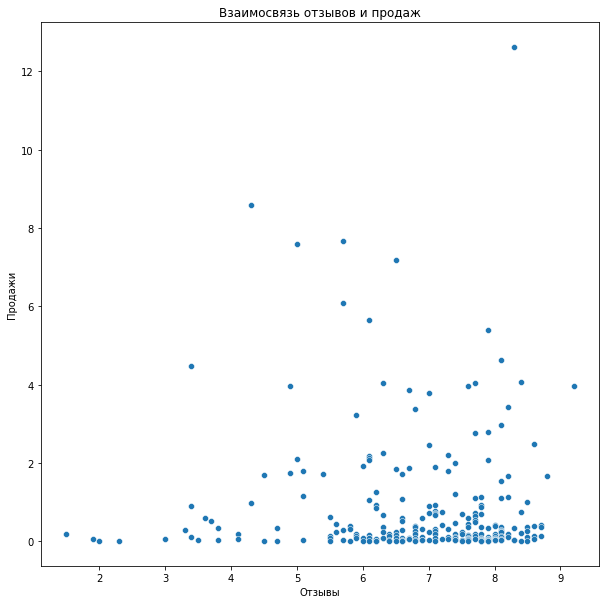

In [44]:
ps4_user_score = sns.scatterplot(data = ps4, x = 'user_score',y = 'total_sales',)
ps4_user_score.figure.set_figwidth(10)
ps4_user_score.figure.set_figheight(10)
plt.title('Взаимосвязь отзывов и продаж')                                        
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.show()

На графике есть слегка увеличение продаж. С повышением оценки идет некий рост продаж, но он крайне мал и к тому же коэффициент корреляции близок к 0. 

In [45]:
print('Корреляция:')
print(ps4['critic_score'].corr(ps4['total_sales']).round(2))

Корреляция:
0.4


Тут уже умеренная корреляция, проверю тоже на графике.


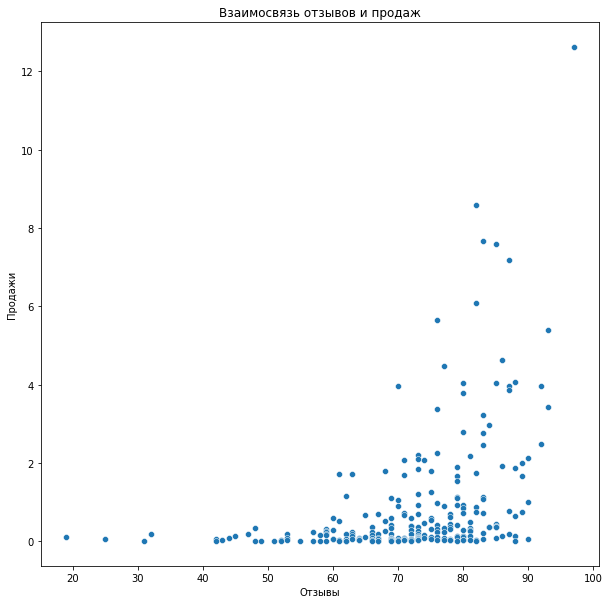

In [46]:
ps4_user_score = sns.scatterplot(data = ps4, x = 'critic_score',y = 'total_sales',)
ps4_user_score.figure.set_figwidth(10)
ps4_user_score.figure.set_figheight(10)
plt.title('Взаимосвязь отзывов и продаж')                                        
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.show()

На данном графие тоже виднеется повышение продаж.
Могу предположить, что оценка критиков больше влияет на продажи,чем оценка пользователей. 

Проверю взаимосвязь еще на одной популярной платформе X360.

In [47]:
x360= actual_platforms.query('platform == "X360"')
#отсортирую по отзывам 
x360.sort_values(by= 'user_score',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4283,LEGO The Hobbit,X360,2014,Action,0.20,0.21,0.0,0.04,70.0,8.7,E10+,0.45
11439,Transformers: Devastation,X360,2015,Action,0.06,0.01,0.0,0.01,NaN,8.4,T,0.08
2249,South Park: The Stick of Truth,X360,2014,Role-Playing,0.58,0.26,0.0,0.09,82.0,8.4,M,0.93
3334,Just Dance 2015,X360,2014,Misc,0.42,0.13,0.0,0.06,NaN,8.3,E10+,0.61
6182,Alien: Isolation,X360,2014,Shooter,0.15,0.10,0.0,0.02,NaN,8.2,M,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...
14539,Rugby 15,X360,2015,Sports,0.00,0.03,0.0,0.00,NaN,NaN,E,0.03
15019,Monster High: New Ghoul in School,X360,2015,Action,0.00,0.02,0.0,0.00,NaN,NaN,E,0.02
15142,Rugby Challenge 3,X360,2016,Sports,0.00,0.02,0.0,0.00,NaN,NaN,E,0.02
16294,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,undefined,0.01


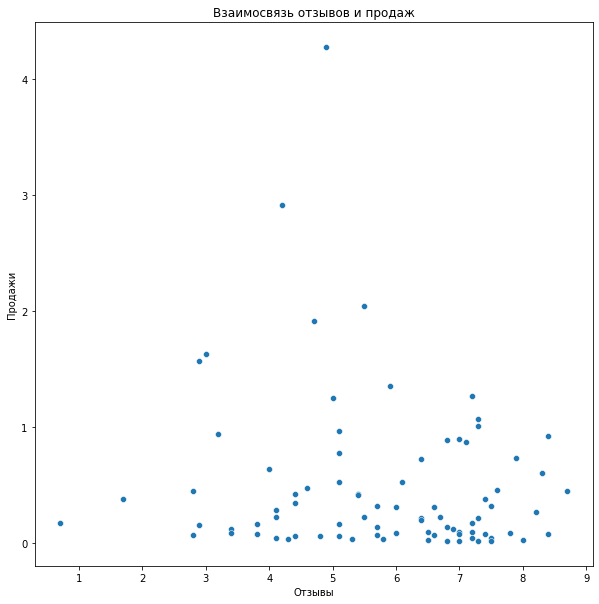

In [48]:
x360_user_score = sns.scatterplot(data = x360, x = 'user_score',y = 'total_sales',)
x360_user_score.figure.set_figwidth(10)
x360_user_score.figure.set_figheight(10)
plt.title('Взаимосвязь отзывов и продаж')                                        
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.show()

In [49]:
print('Корреляция:')
print(x360['user_score'].corr(x360['total_sales']).round(2))

Корреляция:
-0.14


In [50]:
print('Корреляция:')
print(x360['critic_score'].corr(x360['total_sales']).round(2))

Корреляция:
0.53


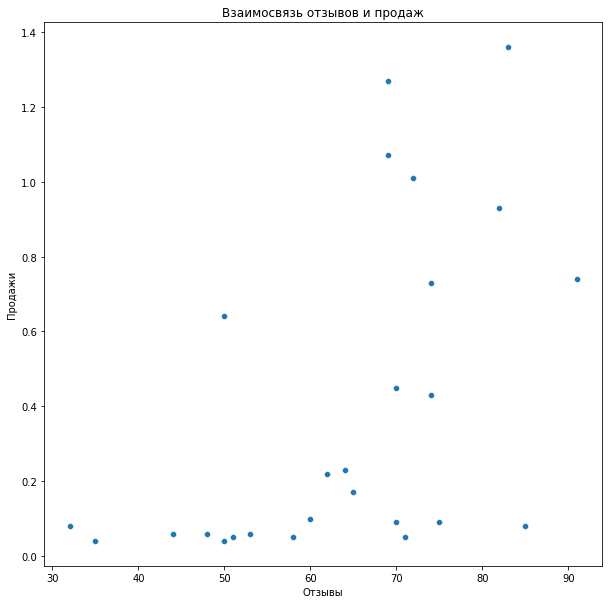

In [51]:
x360_user_score = sns.scatterplot(data = x360, x = 'critic_score',y = 'total_sales',)
x360_user_score.figure.set_figwidth(10)
x360_user_score.figure.set_figheight(10)
plt.title('Взаимосвязь отзывов и продаж')                                        
plt.xlabel('Отзывы')
plt.ylabel('Продажи')
plt.show()

Таким образом графики и коэффициент коррелиция у платформ схожи. Отзывы пользователей не влияют на продажи. В сравнении с отзывами пользователей , отзывы критики больше влияют на продажи, тут уже слегка виден подъем продаж.

**Посмотрю на общее распределение игр по жанрам.**

Выявим какие самые прибыльные жанры и что о них можно сказать?Выделяются ли жанры с высокими и низкими продажами?

Чтобы найти самые прибыльные жанры ,составлю сводную таблицу.

In [52]:
genre=actual_platforms.pivot_table(index='genre',values=['total_sales'],aggfunc='sum')
genre.sort_values(by='total_sales',ascending=False)

,total_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Есть два самых популярных жанра, которые сильно вырываются вперед- экшен и шутер.

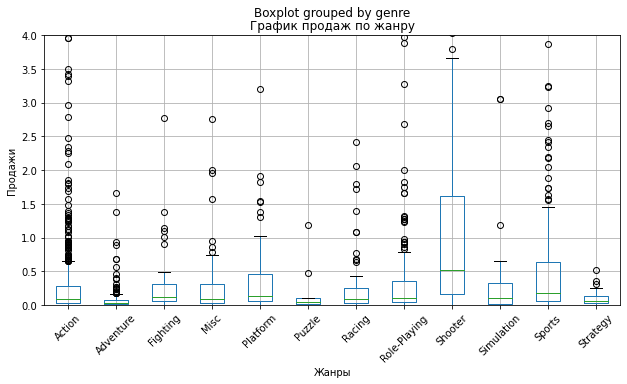

In [53]:
actual_platforms.boxplot(column = ['total_sales'],by = ['genre'],figsize=(10,5))
plt.xticks(rotation=45)
plt.ylim([0, 4])
plt.title('График продаж по жанру')                                        
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

В жанре экшен очень много выбросов,отсюда и общая продажа больше. А вот у нашего второго лидера шутер медианного значение гораздо выше.

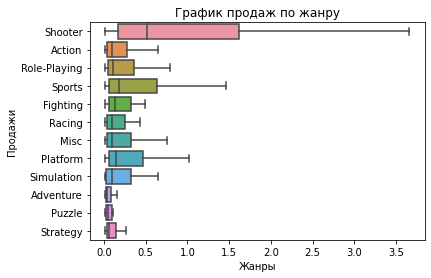

In [54]:
sns.boxplot(data=actual_platforms,x='total_sales',y='genre',showfliers=False)
#plt.ylim([0, 4])
plt.title('График продаж по жанру')                                        
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

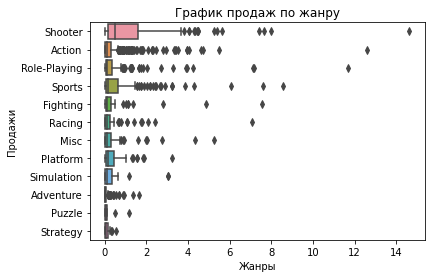

In [55]:
sns.boxplot(data=actual_platforms,x='total_sales',y='genre')
#plt.ylim([0, 4])
plt.title('График продаж по жанру')                                        
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

Таким образом медианное значение выше у жанра шутер, далее с небольшой разницей друг у друга идет спорт и платформ.

Таким образом мы выяснили,что сфера компьютерных игр появилась еще в 1980 году,однако развитие и подъем пошел только после 2003 года. Пик пришелся на 2007-2009 года. Спад с 2011-2012 года, полагаю, что связано это с развитием соц.сетей.

В шестерке лидеров самые популярные платформа PS2,X360,PS3,Wii,DS и PS. В целом срений цикл продолжительности существования платформы - 10 лет. Если рассматривать популярные платформы на актуальный период, тогда платформы **PS4,PS3,X360** лидируют по продажам. В тройке отсающих -Wii,DS,PSP. 

Также мы выяснили, что нет взаимосвязи между оценками критиков или пользователей и количеством общих прадаж.

### check

**Шаг 4. Составление портрета пользователя каждого региона**
<a id='the_destination4'></a>

Нам необходимо определить для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5).

- Самые популярные жанры (топ-5). Пояснить разницу.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [56]:
#сгруппирую данные
top_na=actual_platforms.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum')

top_na=top_na.reset_index()
top_na=top_na.sort_values(by ='na_sales',ascending=False)
top_na


,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05
7,WiiU,19.36
1,PC,7.23
5,PSV,2.52
6,Wii,2.08
4,PSP,0.00


In [57]:
top_eu= actual_platforms.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum')

top_eu=top_eu.reset_index()
top_eu=top_eu.sort_values(by ='eu_sales',ascending=False)
top_eu


,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12
8,X360,15.49
7,WiiU,13.15
5,PSV,3.53
6,Wii,2.59
4,PSP,0.00


In [58]:
top_jp= actual_platforms.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum')

top_jp=top_jp.reset_index()
top_jp=top_jp.sort_values(by ='jp_sales',ascending=False)
top_jp


,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31
4,PSP,0.36
9,XOne,0.32
8,X360,0.08
1,PC,0.00
6,Wii,0.00


Список топ платформ по продажам в EU и NA практически одинаков. В Европейскийх странах PS4,PS3,X360.В Северной Америке лидирует X360,затем уже PS4,PS3.В японии же спиоск топ платформ совсем другой и продажи тоже. Там лидером является 3DS,затем уже встречавшший нам PS3 и PSV.

In [59]:
#сделаю категоризацию "другие"
top_5_na=['X360','PS3','PS4','XOne','3DS']
top_na['popular_platforms']= top_na['platform'].apply(lambda x: x if x in top_5_na else 'others')
top_na

,platform,na_sales,popular_platforms
3,PS4,98.61,PS4
9,XOne,81.27,XOne
8,X360,28.30,X360
0,3DS,22.64,3DS
2,PS3,22.05,PS3
7,WiiU,19.36,others
1,PC,7.23,others
5,PSV,2.52,others
6,Wii,2.08,others
4,PSP,0.00,others


In [60]:
top_na=top_na.groupby(['popular_platforms']).agg({'na_sales':sum})
top_na=top_na.reset_index()
top_na

,popular_platforms,na_sales
0,3DS,22.64
1,PS3,22.05
2,PS4,98.61
3,X360,28.30
4,XOne,81.27
5,others,31.19


In [61]:
#сделаю категоризацию "другие"
top_5_eu=['PS4','XOne','PS3','PC','3DS']
top_eu['popular_platforms']= top_eu['platform'].apply(lambda x: x if x in top_5_eu else 'others')
#сшруппирую по плтформам 
top_eu=top_eu.groupby(['popular_platforms']).agg({'eu_sales':sum})


In [62]:
top_eu=top_eu.reset_index()
top_eu

,popular_platforms,eu_sales
0,3DS,16.12
1,PC,17.97
2,PS3,25.54
3,PS4,130.04
4,XOne,46.25
5,others,34.76


In [63]:
top_5_jp=['3DS','PS$','PSV','PS3','WiiU']
top_jp['popular_platforms']= top_jp['platform'].apply(lambda x: x if x in top_5_jp else 'others')
top_jp=top_jp.groupby(['popular_platforms']).agg({'jp_sales':sum}).sort_values(by='jp_sales',ascending=False)

In [64]:
top_jp=top_jp.reset_index()
top_jp

,popular_platforms,jp_sales
0,3DS,44.24
1,others,15.78
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


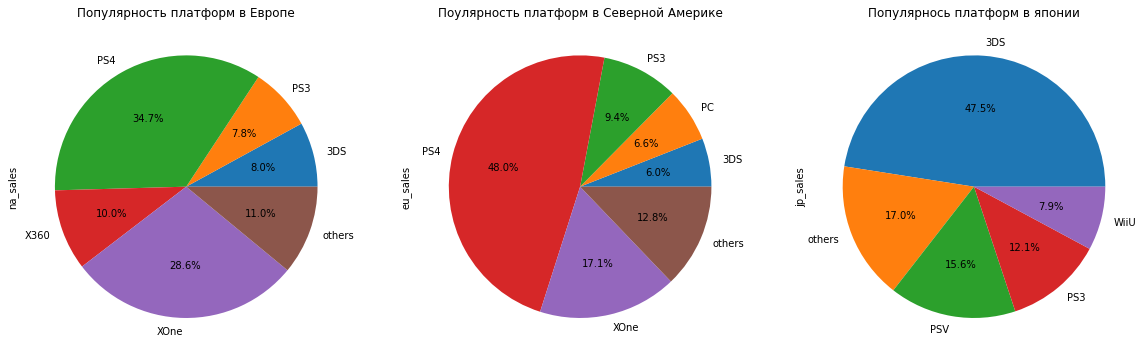

In [65]:
plt.subplot(1, 3, 1)
top_na['na_sales'].plot.pie(labels=top_na['popular_platforms'],autopct='%1.1f%%',figsize=(20,20))
plt.title('Популярность платформ в Европе')  
plt.subplot(1, 3, 2)
top_eu['eu_sales'].plot.pie(labels=top_eu['popular_platforms'],autopct='%1.1f%%',figsize=(20,20))
plt.title('Поулярность платформ в Северной Америке') 
plt.subplot(1, 3, 3)
top_jp['jp_sales'].plot.pie(labels=top_jp['popular_platforms'],autopct='%1.1f%%',figsize=(20,20))
plt.title('Популярнось платформ в японии')
plt.show()

Таким образом в Северной Америке и Европе пользователи отдают предпочтение сходим платформам.

PS4 в Америке занимает 48%, в Европе 34.7.XOne больше пользуется популярностью в Северной Америке,РС3 не сильно различаются в использовании. 

В Японии отдают предпочтение 3DC.

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

In [66]:
#сгруппирую данные
top_na_genre=actual_platforms.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum')

top_na_genre=top_na_genre.reset_index().sort_values(by ='na_sales',ascending=False)
top_na_genre

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05
2,Fighting,12.43
6,Racing,8.74
4,Platform,6.79
1,Adventure,5.64
9,Simulation,2.63


In [67]:
top_5_na_genre=['Shooter','Action','Sports','Role-Playing','Misc']
top_na_genre['popular_genre']=top_na_genre['genre'].apply(lambda x: x if x in top_5_na_genre else 'others')
#сшруппирую по плтформам 
top_na_genre=top_na_genre.groupby(['popular_genre']).agg({'na_sales':sum}).reset_index()
top_na_genre

,popular_genre,na_sales
0,Action,72.53
1,Misc,15.05
2,Role-Playing,33.47
3,Shooter,79.02
4,Sports,46.13
5,others,37.86


In [68]:
#сгруппирую данные
top_eu_genre=actual_platforms.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum')

top_eu_genre=top_eu_genre.reset_index().sort_values(by ='eu_sales',ascending=False)
top_eu_genre

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13
3,Misc,12.86
9,Simulation,7.30
4,Platform,6.80
2,Fighting,6.69
1,Adventure,6.49


In [69]:
top_5_eu_genre=['Action','Shooter','Sports','Role-Playing','Racing']
top_eu_genre['popular_genre']=top_eu_genre['genre'].apply(lambda x: x if x in top_5_eu_genre else 'others')
top_eu_genre=top_eu_genre.groupby(['popular_genre']).agg({'eu_sales':sum}).reset_index()
top_eu_genre

,popular_genre,eu_sales
0,Action,74.68
1,Racing,14.13
2,Role-Playing,28.17
3,Shooter,65.52
4,Sports,45.73
5,others,42.45


In [70]:
#сгруппирую данные
top_jp_genre=actual_platforms.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum')

top_jp_genre=top_jp_genre.reset_index().sort_values(by ='jp_sales',ascending=False)
top_jp_genre

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87
1,Adventure,3.60
10,Sports,3.26
4,Platform,2.69
9,Simulation,2.31
6,Racing,1.76


In [71]:
top_5_jp_genre=['Role-Playing','Action','Fighting','Misk','Shooter']
top_jp_genre['popular_genre']=top_jp_genre['genre'].apply(lambda x: x if x in top_5_jp_genre else 'others')
top_jp_genre=top_jp_genre.groupby(['popular_genre']).agg({'jp_sales':sum}).reset_index()
top_jp_genre

,popular_genre,jp_sales
0,Action,29.58
1,Fighting,6.37
2,Role-Playing,31.16
3,Shooter,4.87
4,others,21.11


Вижу, что в списоке 4 из Топ 5 жанров в Северной Америке и Европе одиноковы. 

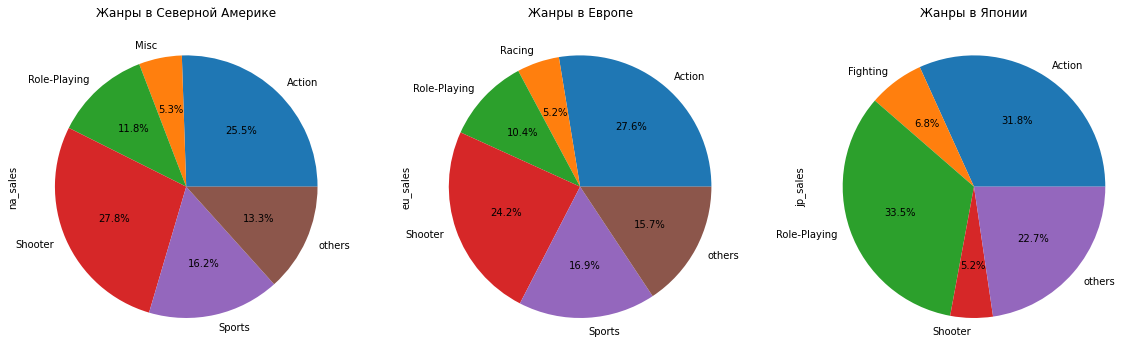

In [72]:
plt.subplot(1, 3, 1)
top_na_genre['na_sales'].plot.pie(labels=top_na_genre['popular_genre'],autopct='%1.1f%%',figsize=(20,20))
plt.title('Жанры в Северной Америке')  
plt.subplot(1, 3, 2)
top_eu_genre['eu_sales'].plot.pie(labels=top_eu_genre['popular_genre'],autopct='%1.1f%%',figsize=(20,20))
plt.title('Жанры в Европе')  
plt.subplot(1, 3, 3)
top_jp_genre['jp_sales'].plot.pie(labels=top_jp_genre['popular_genre'],autopct='%1.1f%%',figsize=(20,20))
plt.title('Жанры в Японии')
plt.show()

В Японии присутвуют схожие жанры, но самым популярным тут являются рол-плеинг и экшен. 

В Европе и Северной Америке первые четыре жанра из популярной пятерки одинаковы. Можем заметить,что разницы минимальны. У пользователя их этих регионов схожие предпочтения.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [73]:
#найду топ 5 рейтингов для каждой группы стран
top_eu_rating=actual_platforms.groupby('rating').agg({'eu_sales':sum})
top_eu_rating=top_eu_rating.sort_values(by='eu_sales',ascending=False).reset_index()
top_eu_rating

,rating,eu_sales
0,M,93.44
1,undefined,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


In [74]:
top_na_rating=actual_platforms.groupby('rating').agg({'na_sales':sum})
top_na_rating=top_na_rating.sort_values(by='na_sales',ascending=False).reset_index()
top_na_rating

,rating,na_sales
0,M,96.42
1,undefined,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


In [75]:
top_jp_rating=actual_platforms.groupby('rating').agg({'jp_sales':sum})
top_jp_rating=top_jp_rating.sort_values(by='jp_sales',ascending=False).reset_index()
top_jp_rating

,rating,jp_sales
0,undefined,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


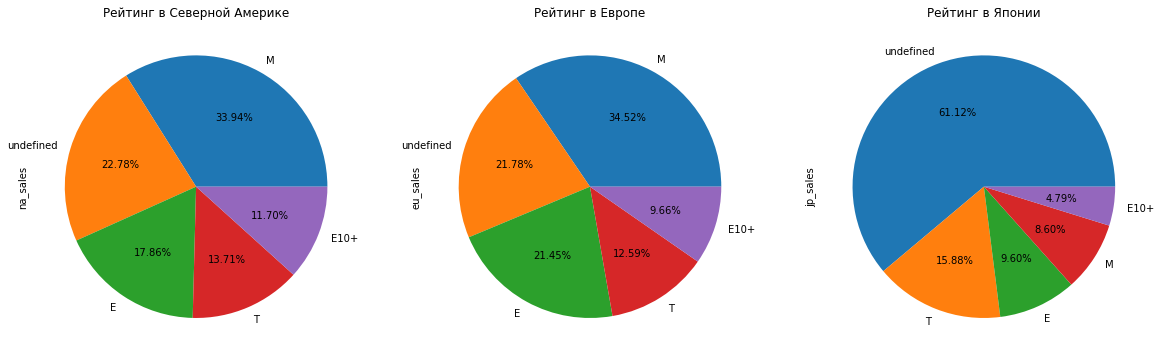

In [76]:
plt.subplot(1, 3, 1)
top_na_rating['na_sales'].plot.pie(labels=top_na_rating['rating'],autopct='%.2f%%' ,figsize=(20,20))
plt.title('Рейтинг в Северной Америке')  
plt.subplot(1, 3, 2)
top_eu_rating['eu_sales'].plot.pie(labels=top_eu_rating['rating'],autopct='%.2f%%' ,figsize=(20,20))
plt.title('Рейтинг в Европе')  
plt.subplot(1, 3, 3)
top_jp_rating['jp_sales'].plot.pie(labels=top_jp_rating['rating'],autopct='%.2f%%' ,figsize=(20,20))
plt.title('Рейтинг в Японии')
plt.show()

Введем немного ясности:

«M» («Mature») — «Для взрослых»

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»

Таким образом в Северной Америке и Европе одинаковая ситуация. Сначала идут «M» («Mature») — «Для взрослых».Затем "Для Всех","Для всех от 10 лет и старше" и уже потом для поростков.

В Яонии же совсем другая ситуация, там лидируют игры "Для всех". В Японии есть своя собственная организация Computer Entertainment Rating Organization,наверное, поэтому они используют свои рейтинговые параметры.

В Северной Америке и Европе популярными платформами считаются PS4,PS3,X360. В Японии совсем другие предпочтения там лидером является 3DS,затем уже встречавшший нам PS3 и PSV.

Если говорить о жанрах: Северная Америка и Европа опять идентиные предпочтения: экшен, шутер, спорт и рол плеинг . В Яонии же на первом месте Рол-плеинг, а вот потом уже экшен. 

### check

**Шаг 5. Проверка гипотез**
<a id='the_destination5'></a>

**Необходимо проверить следующие гипотезы:**

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**5.1.** Для начала сформулирую гипотезы:

h0-Средние пользовательские рейтинги платформ Xbox One и PC равны.

h1-Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [77]:
# задаю уровень значимости
alpha= 0.05

xone=actual_platforms[actual_platforms['platform'] == 'XOne']['user_score'].dropna()
pc=actual_platforms[actual_platforms['platform'] == 'PC']['user_score'].dropna()

# провожу ttest для двух выборок
results = st.ttest_ind(xone, pc)
print(f'p-value: {results.pvalue}')

# проверяю p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    

p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Оснований, чтобы отвергнуть нулевую гипотезу нет, поэтому Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [78]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**5.2.** Сформулирую гипотезы.

h1- Средние пользовательские рейтинги жанров Action и Sports равны.

h2- Средние пользовательские рейтинги жанров Action и Sports разные.


In [79]:
# задаю уровень значимости
alpha= 0.05

action = actual_platforms[(actual_platforms['genre'] == 'Action') & (actual_platforms['user_score'] > 0)]['user_score']
sport =actual_platforms[(actual_platforms['genre'] == 'Sports') & (actual_platforms['user_score'] > 0)]['user_score']

# провожу ttest для двух выборок
results= st.ttest_ind(action,sport)

print(f'p-value: {results.pvalue}')
# проверяю p-value
if results.pvalue <alpha:
    print('Отвергаем гипотезу')
else:
    print('Нет оснований отвергнуть гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем гипотезу


Таким образом: Средние пользовательские рейтинги жанров Action и Sports разные.

### check

<a id='the_destination6'></a>
**Шаг 6. Вывод:**

В своей работе я проанализировала исторические данные о продажах игр, оценки пользователей и экспертов, жанры игр.

Датафрейм содержит в себе 16715 записей. На этапе предобработки я проверила наличие пропусков, явных и неявных дубликатов. Привела наименования столбцов к нижнему регистру и преобразовала тип данных в некоторых столбцах для более качественного анализа.

В исследователском анализе я выяснила, что сфера компьютерных игр появилась еще в 1980 году,однако развитие было только после 2003 года. Тогда начали появляться ПК у некоторых жителей нашей страны,но скорее всего не все могли себе позволить такую "роскошь". Пик приходится на 2007-2009 года, могу смело предположить, что в эти года ПК могли быть практически в каждой семье.

Также выявила, что с 2011-2012 года идет спад развития игровой сферы. В это время уже вовсю было развитие социальных сетей и мобильных телефонов, поэтому это все влияет на рынок. 

Выявлено,что цикл одной платформы -10 лет.Ничто не вечно, все платформы проходят по одному пути: появляются- возрастает спрос- спрос доходит до пика и идет вниз.Далее игровая платформа исчезает.

Так как наша задача сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год, нам нет необходимости анализировать платформы, которые на 2016 год уже пришли к своему завершению. Поэтому далее анализ проводила за актуальный период.

Актуальным периодом можно считать временной промежуток, от 2007 года, т.к. цикл одной платформы 10 лет. Чтобы делать ставку на популярные продукт, необходимо обратиться к платформам, которые либо только появились и двигаются к своему пику,находятся на пике или же близятся к завершению, но еще действуют.

Выявлены две платформы, которые начали свой путь позже и являются еще актуальными на данные момент -PS4 и XOne.Платформа 3DS начала свой путь раньше, не еще хорошо держится на рынке. Но успешность игры зависит от региона и пользователей , которые будут в неё играть.

Если пользователи из Северной Америки или Европы, там практически одинаковые предпочтения по жанру и игровой платформе. Если говорить про Японию, там предпочтения пользователей совершенно разные. **Поэтому чтобы спланировать рекламные кампании нужно акцентировать внимание на жанрах игры и платформы, интересных в каждом регионе .**

**Таким образом, если рекламная кампания планируется на продукт в Европе или Северной Америке- выбирать необходимо жанры Экшен или Шутер. Платформу лучше выбрать PS4,т.к PS3,X360 уже исполняется 11 лет. В Японии предпочтительны жанры рол-плеинг и экшн. А платформы 3DS.**


### Бонус